# **Data Loading**

In [1]:
from google.colab import drive
import os
import zipfile

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
# Mount Google Drive to access kaggle.json
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Copy kaggle.json from Google Drive
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d rikdifos/credit-card-approval-prediction

# Unzip it
with zipfile.ZipFile("credit-card-approval-prediction.zip", "r") as zip_ref:
    zip_ref.extractall("credit_data")

Dataset URL: https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction
License(s): CC0-1.0
  0% 0.00/5.32M [00:00<?, ?B/s]
100% 5.32M/5.32M [00:00<00:00, 321MB/s]


In [4]:
# Load the application and credit data
app_raw = pd.read_csv("credit_data/application_record.csv")
cred_raw = pd.read_csv("credit_data/credit_record.csv")

# **Data Exploration**

In [5]:
app_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [6]:
app_raw.sample()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
133372,5626961,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-21741,365243,1,0,0,1,NaN,1.0


In [7]:
app_raw['ID'].duplicated().any()

np.True_

In [8]:
app_raw[app_raw['ID'].duplicated(keep=False)].sort_values('ID')

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
425023,7022197,F,N,Y,0,450000.0,Commercial associate,Higher education,Separated,House / apartment,-19813,-1799,1,0,0,1,NaN,1.0
426818,7022197,M,Y,Y,3,135000.0,Working,Secondary / secondary special,Married,House / apartment,-11945,-735,1,0,0,1,Laborers,5.0
431911,7022327,M,Y,Y,0,256500.0,Commercial associate,Higher education,Married,House / apartment,-21503,-1674,1,0,0,1,Core staff,2.0
431545,7022327,F,N,Y,0,135000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-14771,-5298,1,0,0,0,High skill tech staff,1.0
425486,7023108,M,Y,Y,1,67500.0,Working,Secondary / secondary special,Married,House / apartment,-15156,-1696,1,1,0,0,Core staff,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426563,7836711,F,N,Y,2,292500.0,Working,Higher education,Married,House / apartment,-13747,-4386,1,0,1,0,Accountants,4.0
428620,7836971,F,N,Y,0,103500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-13383,-2798,1,0,1,0,Sales staff,2.0
421464,7836971,M,Y,N,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13771,-5520,1,0,0,0,NaN,3.0
422068,7838075,M,N,Y,0,337500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18198,-1275,1,0,0,1,Drivers,2.0


In [9]:
app_raw.isna().values.any()

np.True_

In [10]:
app_raw.isna().mean()[app_raw.isna().any()] * 100

,0
OCCUPATION_TYPE,30.601039


In [11]:
cred_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [12]:
cred_raw.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [13]:
cred_raw['ID'].nunique()

45985

In [14]:
cred_raw['STATUS'].value_counts(normalize=True, dropna=False) * 100

,proportion
STATUS,
C,42.155401
0,36.537205
X,19.953747
1,1.057626
5,0.161457
2,0.082779
3,0.030518
4,0.021267


In [15]:
cred_raw.isna().values.any()

np.False_

# **Data Reduction || Labeling, Converting & Aggregating**

## FLAG_OVERDUE_30D

In [16]:
cred_prep = cred_raw.copy()
cred_prep['FLAG_OVERDUE_30D'] = cred_prep['STATUS'].isin(['1', '2', '3', '4', '5']).astype(int)
cred_prep[['STATUS', 'FLAG_OVERDUE_30D']].sample(5)

,STATUS,FLAG_OVERDUE_30D
176052,0,0
91727,C,0
704454,X,0
460745,C,0
674627,C,0


In [17]:
cred_prep['FLAG_OVERDUE_30D'].value_counts(normalize=True) * 100

,proportion
FLAG_OVERDUE_30D,
0,98.646353
1,1.353647


## MONTHS_RECORD

In [18]:
cred_prep['MONTHS_RECORD'] = cred_prep['MONTHS_BALANCE'].abs()
cred_prep[['MONTHS_BALANCE', 'MONTHS_RECORD']].head()

,MONTHS_BALANCE,MONTHS_RECORD
0,0,0
1,-1,1
2,-2,2
3,-3,3
4,0,0


In [19]:
cred_prep.columns.tolist()

['ID', 'MONTHS_BALANCE', 'STATUS', 'FLAG_OVERDUE_30D', 'MONTHS_RECORD']

In [20]:
cred_prep = cred_prep.groupby('ID')[['MONTHS_RECORD', 'FLAG_OVERDUE_30D']].max().reset_index()
cred_prep

,ID,MONTHS_RECORD,FLAG_OVERDUE_30D
0,5001711,3,0
1,5001712,18,0
2,5001713,21,0
3,5001714,14,0
4,5001715,59,0
...,...,...,...
45980,5150482,28,0
45981,5150483,17,0
45982,5150484,12,0
45983,5150485,1,0


# **Data Blending**

In [21]:
app_raw.loc[app_raw['ID'].duplicated(), 'ID'].isin(cred_prep['ID']).any()

np.False_

In [22]:
cred_prep['ID'].duplicated().any()

np.False_

In [23]:
merged_df = pd.merge(app_raw, cred_prep, on='ID', how='inner')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

# **Data Cleansing || Dropping, Converting & Fixing**

## ID

In [24]:
prep_df = merged_df.drop('ID', axis=1)
prep_df.sample()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_RECORD,FLAG_OVERDUE_30D
1396,F,Y,Y,0,315000.0,Commercial associate,Secondary / secondary special,Separated,House / apartment,-18184,-3021,1,0,1,1,Laborers,1.0,9,0


In [25]:
prep_df.select_dtypes(include='number').nunique()

,0
CNT_CHILDREN,9
AMT_INCOME_TOTAL,265
DAYS_BIRTH,7183
DAYS_EMPLOYED,3640
FLAG_MOBIL,1
FLAG_WORK_PHONE,2
FLAG_PHONE,2
FLAG_EMAIL,2
CNT_FAM_MEMBERS,10
MONTHS_RECORD,61


## DAYS_BIRTH

In [26]:
prep_df[prep_df['DAYS_BIRTH'] == 0].values.any()

np.False_

In [27]:
prep_df['DAYS_BIRTH'].head()

,DAYS_BIRTH
0,-12005
1,-12005
2,-21474
3,-19110
4,-19110


In [28]:
prep_df['DAYS_BIRTH'] = prep_df['DAYS_BIRTH'].abs()
prep_df['DAYS_BIRTH'].head()

,DAYS_BIRTH
0,12005
1,12005
2,21474
3,19110
4,19110


## FLAG_MOBIL

In [29]:
prep_df['FLAG_MOBIL'].value_counts(normalize=True) * 100

,proportion
FLAG_MOBIL,
1,100.0


In [30]:
prep_df.drop('FLAG_MOBIL', axis=1, inplace=True)
prep_df.shape

(36457, 18)

In [31]:
prep_df.select_dtypes(include='number').describe().T

,count,mean,std,min,25%,50%,75%,max
CNT_CHILDREN,36457.0,0.430315,0.742367,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,36457.0,186685.736662,101789.226482,27000.0,121500.0,157500.0,225000.0,1575000.0
DAYS_BIRTH,36457.0,15975.173382,4200.549944,7489.0,12462.0,15563.0,19438.0,25152.0
DAYS_EMPLOYED,36457.0,59262.935568,137651.334859,-15713.0,-3153.0,-1552.0,-408.0,365243.0
FLAG_WORK_PHONE,36457.0,0.225526,0.417934,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,36457.0,0.294813,0.455965,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,36457.0,0.089722,0.285787,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,36457.0,2.198453,0.911686,1.0,2.0,2.0,3.0,20.0
MONTHS_RECORD,36457.0,26.164193,16.501854,0.0,12.0,24.0,39.0,60.0
FLAG_OVERDUE_30D,36457.0,0.117700,0.322257,0.0,0.0,0.0,0.0,1.0


## DAYS_EMPLOYED

In [32]:
prep_df['DAYS_EMPLOYED'].dtype

dtype('int64')

In [33]:
prep_df[prep_df['DAYS_EMPLOYED'] == 0].values.any()

np.False_

In [34]:
print(f"Count of unique values < 0: {prep_df[prep_df['DAYS_EMPLOYED'] < 0]['DAYS_EMPLOYED'].nunique()}")
print(f"Count of unique values > 0: {prep_df[prep_df['DAYS_EMPLOYED'] > 0]['DAYS_EMPLOYED'].nunique()}")

Count of unique values < 0: 3639
Count of unique values > 0: 1


In [35]:
prep_df[prep_df['DAYS_EMPLOYED'] > 0]['DAYS_EMPLOYED'].unique()

array([365243])

In [36]:
prep_df['DAYS_EMPLOYED'] = prep_df['DAYS_EMPLOYED'].replace(365243, np.nan)
prep_df['DAYS_EMPLOYED'] = np.where(prep_df['DAYS_EMPLOYED'].isna(), -1, prep_df['DAYS_EMPLOYED'].abs())
prep_df['DAYS_EMPLOYED'] = prep_df['DAYS_EMPLOYED'].astype(int)

print(f"Count of unique values < 0: {prep_df[prep_df['DAYS_EMPLOYED'] < 0]['DAYS_EMPLOYED'].nunique()}")
print(f"Count of unique values > 0: {prep_df[prep_df['DAYS_EMPLOYED'] > 0]['DAYS_EMPLOYED'].nunique()}")

Count of unique values < 0: 1
Count of unique values > 0: 3639


In [37]:
prep_df[prep_df['DAYS_EMPLOYED'] < 0]['DAYS_EMPLOYED'].unique()

array([-1])

In [38]:
prep_df.select_dtypes(include='object').nunique()

,0
CODE_GENDER,2
FLAG_OWN_CAR,2
FLAG_OWN_REALTY,2
NAME_INCOME_TYPE,5
NAME_EDUCATION_TYPE,5
NAME_FAMILY_STATUS,5
NAME_HOUSING_TYPE,6
OCCUPATION_TYPE,18


## CODE_GENDER

In [39]:
prep_df['CODE_GENDER'].value_counts(normalize=True) * 100

,proportion
CODE_GENDER,
F,67.010451
M,32.989549


In [40]:
prep_df['FLAG_GENDER'] = prep_df['CODE_GENDER'].map({'F': 0, 'M': 1})
prep_df.drop('CODE_GENDER', axis=1, inplace=True)
prep_df['FLAG_GENDER'].value_counts(normalize=True) * 100

,proportion
FLAG_GENDER,
0,67.010451
1,32.989549


## FLAG_CAR

In [41]:
prep_df['FLAG_OWN_CAR'].value_counts(normalize=True) * 100

,proportion
FLAG_OWN_CAR,
N,62.02924
Y,37.97076


In [42]:
prep_df['FLAG_CAR'] = prep_df['FLAG_OWN_CAR'].map({'N': 0, 'Y': 1})
prep_df.drop('FLAG_OWN_CAR', axis=1, inplace=True)
prep_df['FLAG_CAR'].value_counts(normalize=True) * 100

,proportion
FLAG_CAR,
0,62.02924
1,37.97076


## FLAG_REALTY

In [43]:
prep_df['FLAG_OWN_REALTY'].value_counts(normalize=True) * 100

,proportion
FLAG_OWN_REALTY,
Y,67.218915
N,32.781085


In [44]:
prep_df['FLAG_REALTY'] = prep_df['FLAG_OWN_REALTY'].map({'N': 0, 'Y': 1})
prep_df.drop('FLAG_OWN_REALTY', axis=1, inplace=True)
prep_df['FLAG_REALTY'].value_counts(normalize=True) * 100

,proportion
FLAG_REALTY,
1,67.218915
0,32.781085


## OCCUPATION_TYPE

In [45]:
prep_df['OCCUPATION_TYPE'].unique()

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [46]:
prep_df['OCCUPATION_TYPE'].isna().sum() / len(prep_df) * 100

np.float64(31.05850728255205)

In [47]:
prep_df.drop('OCCUPATION_TYPE', axis=1, inplace=True)
prep_df.shape

(36457, 17)

# **Data Validation || Filtering, Detecting & Dropping**

## Checking Cardinality

In [48]:
for col in prep_df.select_dtypes(include='object').columns.tolist():
    print(prep_df[col].value_counts(normalize=True) * 100)
    print()

NAME_INCOME_TYPE
Working                 51.619716
Commercial associate    23.287709
Pensioner               16.874674
State servant            8.187728
Student                  0.030173
Name: proportion, dtype: float64

NAME_EDUCATION_TYPE
Secondary / secondary special    67.962257
Higher education                 27.056532
Incomplete higher                 3.867570
Lower secondary                   1.025866
Academic degree                   0.087775
Name: proportion, dtype: float64

NAME_FAMILY_STATUS
Married                 68.705598
Single / not married    13.245742
Civil marriage           8.078010
Separated                5.768440
Widow                    4.202211
Name: proportion, dtype: float64

NAME_HOUSING_TYPE
House / apartment      89.277779
With parents            4.871492
Municipal apartment     3.094056
Rented apartment        1.577201
Office apartment        0.718655
Co-op apartment         0.460817
Name: proportion, dtype: float64



In [49]:
housing_realty = (
    prep_df
    .groupby('NAME_HOUSING_TYPE')['FLAG_REALTY']
    .value_counts(normalize=True)
    .mul(100)
    .unstack()
)
housing_realty

FLAG_REALTY,0,1
NAME_HOUSING_TYPE,,
Co-op apartment,35.714286,64.285714
House / apartment,29.565565,70.434435
Municipal apartment,63.829787,36.170213
Office apartment,58.778626,41.221374
Rented apartment,42.608696,57.391304
With parents,64.695946,35.304054


In [50]:
prep_df.select_dtypes(include='number').describe().T

,count,mean,std,min,25%,50%,75%,max
CNT_CHILDREN,36457.0,0.430315,0.742367,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,36457.0,186685.736662,101789.226482,27000.0,121500.0,157500.0,225000.0,1575000.0
DAYS_BIRTH,36457.0,15975.173382,4200.549944,7489.0,12462.0,15563.0,19438.0,25152.0
DAYS_EMPLOYED,36457.0,2200.148888,2366.953234,-1.0,408.0,1552.0,3153.0,15713.0
FLAG_WORK_PHONE,36457.0,0.225526,0.417934,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,36457.0,0.294813,0.455965,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,36457.0,0.089722,0.285787,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,36457.0,2.198453,0.911686,1.0,2.0,2.0,3.0,20.0
MONTHS_RECORD,36457.0,26.164193,16.501854,0.0,12.0,24.0,39.0,60.0
FLAG_OVERDUE_30D,36457.0,0.117700,0.322257,0.0,0.0,0.0,0.0,1.0


## Detecting Outliers

In [51]:
# Shared variables
flag_cols = ['FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'FLAG_OVERDUE_30D',
             'FLAG_GENDER', 'FLAG_CAR', 'FLAG_REALTY']
outlier_cols = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS']

# Remaining numeric columns
numeric_cols = prep_df.select_dtypes(include='number').columns.tolist()
remaining_cols = []
for col in numeric_cols:
    if col not in flag_cols:
        remaining_cols.append(col)

# Formatter to display thousands with 'k' (but not on 0)
def format_k(x, pos):
    if x == 0:
        return '0'
    if abs(x) >= 1000:
        return str(int(x / 1000)) + 'k'
    return str(int(x))

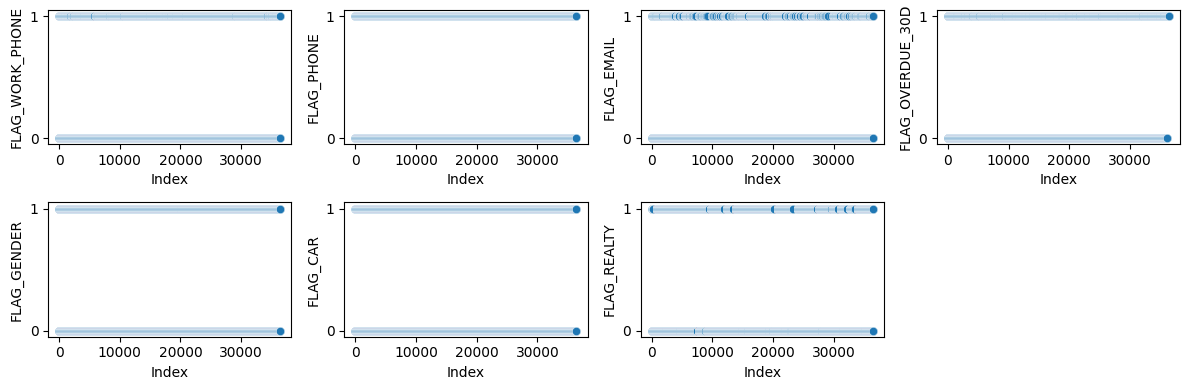

In [52]:
# Set grid size
fig, axes = plt.subplots(2, 4, figsize=(12, 4))  # 2x4 for 7 flags, 8 slots total
axes = axes.flatten()

# Plot each flag column
for i in range(len(flag_cols)):
    col = flag_cols[i]
    ax = axes[i]
    sns.scatterplot(x=prep_df.index, y=prep_df[col], ax=ax, alpha=0.4)
    ax.set_xlabel("Index")
    ax.set_ylabel(col)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))  # Show integers only

# Hide unused axes
for j in range(len(flag_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

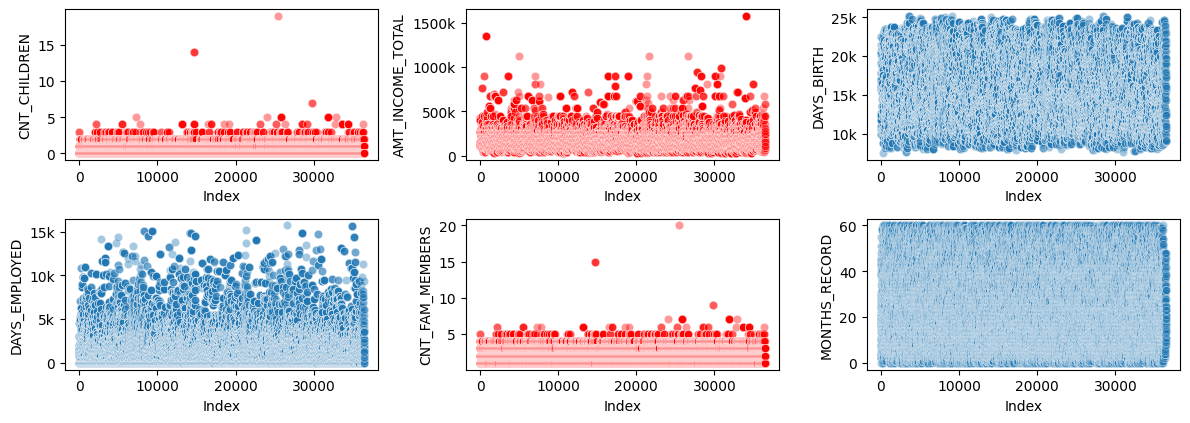

In [53]:
# Set grid size
fig, axes = plt.subplots(3, 3, figsize=(12, 6))  # 3x3 fixed layout
axes = axes.flatten()

# Plot each remaining numeric column
for i in range(len(remaining_cols)):
    col = remaining_cols[i]
    ax = axes[i]
    color = 'red' if col in outlier_cols else None

    sns.scatterplot(x=prep_df.index, y=prep_df[col], ax=ax, alpha=0.4, color=color)
    ax.set_xlabel("Index")
    ax.set_ylabel(col)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_k))

# Hide unused axes
for j in range(len(remaining_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Detecting Multicollinearity

In [54]:
prep_df.select_dtypes(include='number').sample()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_RECORD,FLAG_OVERDUE_30D,FLAG_GENDER,FLAG_CAR,FLAG_REALTY
648,0,135000.0,19056,99,1,0,0,2.0,41,0,1,1,0


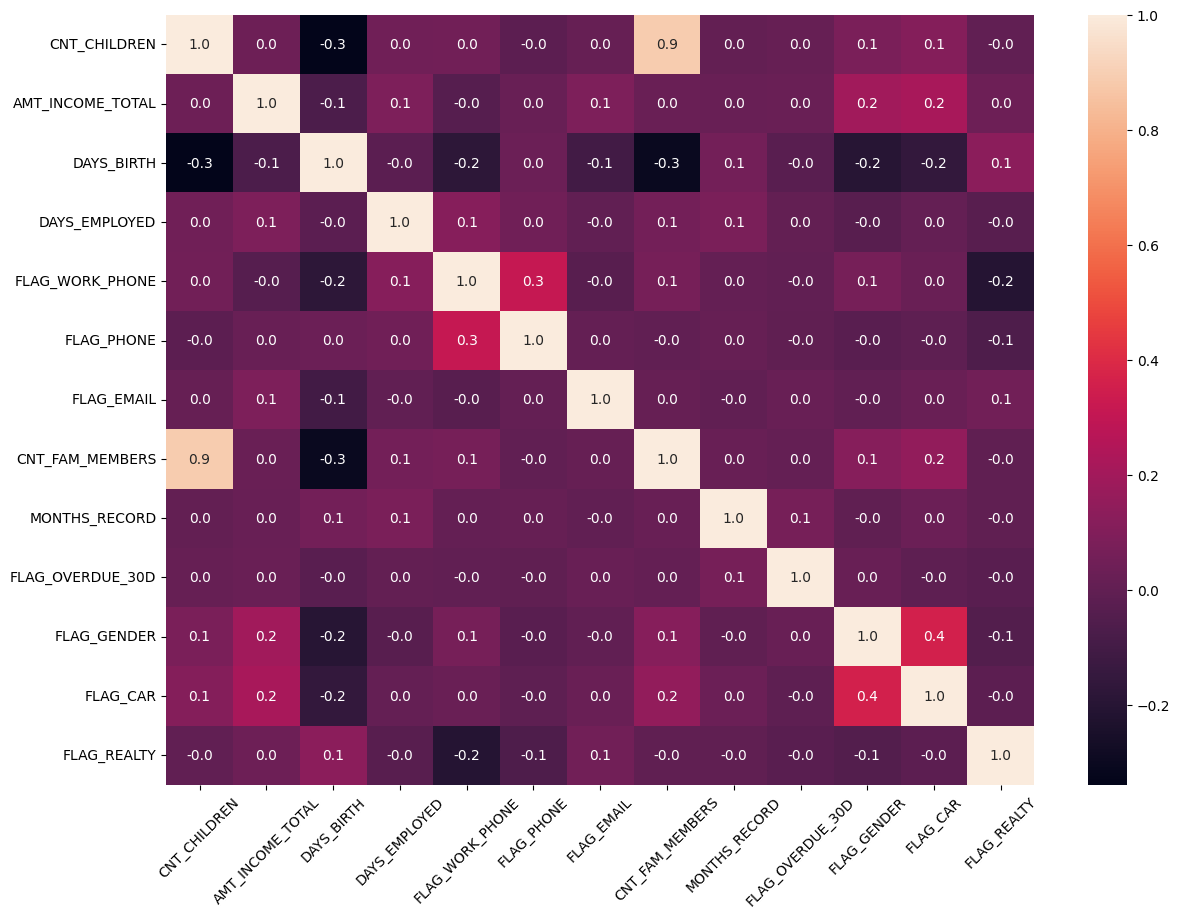

In [55]:
# Visualize correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(
    prep_df.corr(numeric_only=True),
    annot=True,
    fmt=".1f"
)
plt.xticks(rotation=45)
plt.show()

In [56]:
# Identify multicollinearity
corr_matrix = prep_df.corr(numeric_only=True).abs()
upper_corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_cols = [col for col in upper_corr.columns.tolist() if any(upper_corr[col] > 0.7)]
high_corr_cols

['CNT_FAM_MEMBERS']

In [57]:
cleaned_df = prep_df.copy()

# Export data
filename = 'credit_data_prepared.csv'
cleaned_df.to_csv(filename, index=False)

print("File saved at:", os.path.abspath(filename))

File saved at: /content/credit_data_prepared.csv
